<h2><center>CSCI-UA 9473 Introduction to Machine Learning </center></h2>

<h3><center>Assignment 1: Gradient descent
 </center></h3>



__Given date:__ February 9

__Due date:__ February 21

__Total:__ 15pts

### Question 1. (5pts) Local vs global minimas and gradient descent

We consider the following function.

\begin{align}
F(x_1, x_2) =  3(1-x_1)^2\exp(-(x_1^2) - (x_2+1)^2)\\ 
   - 10(x_1/5 - x_1^3 - x_2^5)\exp(-x_1^2-x_2^2)\\
   - (1/3)\exp(-(x_1+1)^2 - x_2^2)
\end{align}

The surface plot of this function is given below together with its contour plot. The function has a single global minimum located near $(0.23, -1.62)$ and shown in red in the contour plot.

We want to implement gradient descent iterations on that function. Starting from a random initial point $(x_1, x_2)$, code the following updates 

\begin{align}
x_1^{(k+1)} = x_1^{(k)} - \eta * \text{grad}_{x_1} F(x_1, x_2)\\
x_2^{(k+1)} = x_2^{(k)} - \eta * \text{grad}_{x_2} F(x_1, x_2)
\end{align}

where $\text{grad}_{x_i}$ represents the gradient of $F(x_1, x_2)$ with respect to $x_i$. Choose a sufficiently small learning rate and plot the iterates (in white) on the contour plot. Repeat your experiments for various initial iterates.  

/var/folders/4t/xbxccjh13tn9x9739c4pcqlw0000gn/T/ipykernel_13842/442626572.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


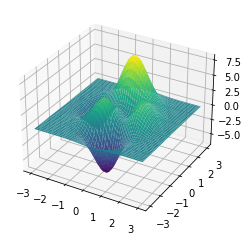

In [1]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()



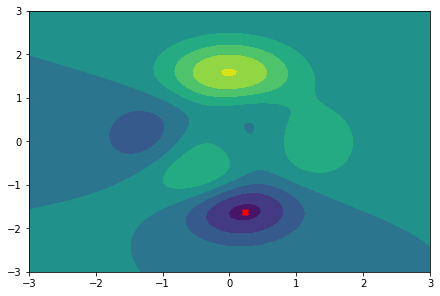

In [2]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

The random point picked is (0.781877, 2.285650)
The predicted (local) minimum is (1.469274, 3.500214)
The global minimum is (0.23, -1.62)


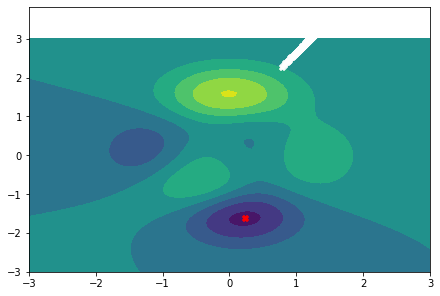

In [3]:
# put your solution here
lr = 0.01
max_iter = 1000
X1 = np.random.uniform(-3, 3)
X2 = np.random.uniform(-3, 3)
print("The random point picked is (%f, %f)" % (X1, X2))

fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F, cmap = 'viridis')
plt.scatter(X1, X2, c='w', marker='X')

for i in range(max_iter):
    grad_X1 = -6*(1-X1)*np.exp(-(X1**2)-(X2+1)**2)*(1+X1-X1**2) - 10*np.exp(-(X1**2)-(X2**2))*(1/5-17/5*(X1**2)+2*(X1**4)+2*X1*(X2**5)) + 2/3*(X1+1)*np.exp(-(X1+1)**2-X2**2)
    grad_X2  = -6*((1-X1)**2)*(X2+1)*np.exp(-X1**2-(X2+1)**2)    - 10*np.exp(-X1**2-X2**2)*(-5*X2**4-2/5*X1*X2+2*X1**3*X2+2*X2**6)       + 2/3*X2*np.exp(-(X1+1)**2-X2**2)
    X1 -= lr * grad_X1
    X2 -= lr * grad_X2

    plt.scatter(X1, X2, c='w', marker='X')

print("The predicted (local) minimum is (%f, %f)" % (X1, X2))
print("The global minimum is (0.23, -1.62)")


plt.scatter(0.23, -1.62, c='r', marker='X')
plt.show()


### Question 2. (5pts) Regression through the normal equations 

We consider the simple regression problem below, similar to the one discussed in class. 
Find the model that minimizes the sum of squares loss

\begin{align}
\ell(\boldsymbol \beta) = \frac{1}{2N}\sum_{i=1}^N (t_{\text{noisy}}^{(i)} -  (\beta_0 +\beta_1 x^{(i)}))^2
\end{align}

__using the Normal Equations__. To do this:

- Start by building the matrix $\tilde{\boldsymbol X}$ with
\begin{align}
\tilde{\boldsymbol X} = \left[\begin{array}{cc}
1 & x^{(1)} \\
\vdots & \vdots \\
1 & x^{(N)} \end{array}\right]
\end{align}
- Then compute the matrix $\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}$ and the vector $\tilde{\boldsymbol X}^T\boldsymbol t$ where $\boldsymbol t = [t_{\text{noisy}}^{(1)}, \ldots , t^{(N)}_{\text{noisy}}]^T$

- Finally solve the equations through

\begin{align}
\boldsymbol \beta_{\text{OLS}} = \left(\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}\right)^{-1}(\tilde{\boldsymbol X}^T\boldsymbol t) 
\end{align}

using the function __np.linalg.inv__ from the linear algebra package. Plot the result in green on top of the plot below and compare with the true (blue) (unknown) model.  


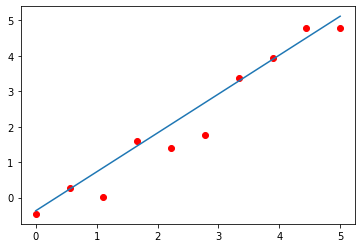

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,2)

t = beta_true[0] + beta_true[1]*x

tnoisy = t+noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

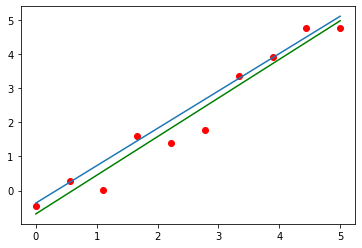

In [5]:
X = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1)))
mat = np.dot(np.transpose(X), X)
vector = np.dot(np.transpose(X), tnoisy)
beta = np.dot(np.linalg.inv(mat), vector)

t_pred = np.dot(X, beta)

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(x, t_pred, c='g')
plt.show()

### Question 3 [5pts]. Successive orthogonalization

We once again consider the dataset from Question 2. This time we will focus on an extended model containing not only the original features but also order 2 and 3 monomials in those features. 

We want to rely on _successive orthogonalization_ to derive the regression vector $\mathbf{\beta}$. 

Let $\tilde{\mathbf{X}}$ denote the feature matrix, with first column being the vector $[1,1,...,1]$, second column being the original feature vector $x$, third column containing the degree two monomials, and so on.

Starting with $\mathbf{z}_0 = \mathbf{c}_0$ (the first column of $\tilde{\mathbf{X}}$), successive orthogonalization of the columns $\mathbf{c}_j$ of $\tilde{\mathbf{X}}$ can be encoded as follows

1. Initialize $\mathbf{z}_0 = \mathbf{c}_0$



2. For j=1,2,..., D

    Compute the coefficient $\hat{\gamma}_{\ell,j}$ for $\ell=0,..., j-1$ as
     
    $$\hat{\gamma}_{\ell, j} = \frac{\langle \mathbf{z}_\ell, \mathbf{c}_j\rangle }{\langle \mathbf{z}_\ell, \mathbf{z}_\ell\rangle}$$
    
    And define the new column $\mathbf{z}_j$ as 
    
    $$\mathbf{z}_j = \mathbf{c}_j - \sum_{k=0}^{j-1}\hat{\gamma}_{kj}\mathbf{z}_k\quad \quad (*)$$


Once we have all the $\mathbf{z}_j's$ we can compute the projection of the (noisy) target vector $\mathbf{t}_{\varepsilon}$ onto each $\mathbf{z}_j$ as 
$\langle \mathbf{z}_j, \mathbf{t}_{\varepsilon}\rangle/\langle\mathbf{z}_j,\mathbf{z}_j \rangle$

Since the $\mathbf{z}_{D+1}$ is the only $\mathbf{z}_j$ that contains $\mathbf{x}_{D+1}$ this gives us the coefficient $\hat{\beta}_{D+1}$. I.e. 

$$\hat{\beta}_{D+1} =  \frac{\langle \mathbf{z}_{D+1}, \mathbf{t}_{\varepsilon}\rangle }{\langle\mathbf{z}_{D+1},\mathbf{z}_{D+1} \rangle} $$

The remaining $\hat{\beta}_j$ can be derived by using the recursion (*) on the $\mathbf{z}_j$, projecting the target vector $\mathbf{t}_{\varepsilon}$ on $\mathbf{z}_j$ and expressing $\mathbf{z}_j$ from the recursion as a linear combination of the $\mathbf{c}_j$

Implement a function that realizes successive orthogonalization and returns the vector of regression weights $\mathbf{\beta}$. 

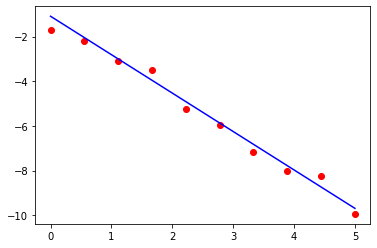

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,2)

t = beta_true[0] + beta_true[1]*x

tnoisy = t+noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t, c='b')
plt.show()

No handles with labels found to put in legend.


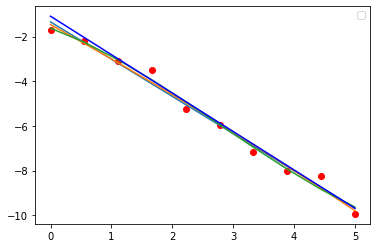

In [7]:
from sklearn.preprocessing import PolynomialFeatures

def successive_orthogonalization(x_tilde, D, tnoisy):
    # zs = [x_tilde[:, 0]]
    zs = np.zeros((len(x_tilde), D+1))
    zs[:, 0] = x_tilde[:, 0]
    beta = np.zeros(D+1)
    beta[0] = np.dot(zs[:, 0], tnoisy) / np.dot(zs[:, 0], zs[:, 0])

    for i in range(1, D+1):
        zi = x_tilde[:, i]
        for j in range(i):
            zi -= np.dot(np.dot(zs[:, j], x_tilde[:, i]) / np.dot(zs[:, j], zs[:, j]), zs[:, j])
        zs[:, i] = zi
        beta[i] = np.dot(zs[:, i], tnoisy) / np.dot(zs[:, i], zs[:, i])

    return beta

D = 3
poly = PolynomialFeatures(D)
x_tilde = poly.fit_transform(x.reshape(-1, 1))
beta = successive_orthogonalization(x_tilde, D, tnoisy)
pred = 0
# for i in range(len(beta)):
#     pred += beta[i] * x**i
#     if i > 0:
#         plt.plot(x, pred, label="degree %d" % i)
pred = np.dot(x_tilde[:, :2], beta[:2])
plt.plot(x, pred)
pred = np.dot(x_tilde[:, :3], beta[:3])
plt.plot(x, pred)
pred = np.dot(x_tilde[:, :4], beta[:4])
plt.plot(x, pred)

plt.scatter(x, tnoisy, c='r')
plt.legend(loc="upper right")
plt.plot(x, t, c='b')
plt.show()